### Setup:
 
This code as well as the recent version of NeuronC at the time of publication are tested to run under Ubuntu 16.04 LTS with python 3. Rendering of 3D morphologies (figure A and second part of figure F) requires POV-Ray.
 
 1. The file ``hc_model.py`` has to be in the same directory as this jupyter notebook file.
 2. Download and unpack NeuronC (http://retina.anatomy.upenn.edu/~rob/neuronc.html)
 3. Adjust the compiler directive ``CFLAGS`` in ``/nc/models/retsim/make`` according to your 
    system.
 4. Copy the experiment file ``expt_hc_local_final.cc`` into the retsim directory 
    (``/nc/models/retsim``)
 5. Add the experiment to ``makefile``: add the line ``expt_hc_local_final.$(DLSUFFIX)`` 
    to the list of experiments.
 6. Copy the files ``dens_hb_final.n``, ``nval_hb_final.n``, and ``morph_HC_dendrite`` into the 
    directory ``/nc/models/retsim/runconf``. 
 7. Run ``make`` **both** in ``/nc/models/retsim/`` and ``/nc/``.
 8. Add the path to your retsim installation below.


In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import brent
import hc_model 
%matplotlib inline
sns.set_style('white')
matplotlib.rcParams.update({'mathtext.default': 'regular'})
matplotlib.rcParams.update({'font.size': 14})

In [5]:
#Add full path to the retsim installation 
retsim_dir='/home/tom/nc/models/retsim/' 

In [6]:
hc_model.set_dir(retsim_dir)

In [7]:
# load morphology file and adjust coordinates
morph=pd.read_csv(retsim_dir+'runconf/morph_hc_dendrite',delim_whitespace=True,header=None,\
            comment='#',names=['node','parent','dia','x','y','z','region','dend'])
morph['x_new']=((morph['x']-np.min(morph['x']))*100)
morph['y_new']=((morph['y']-np.min(morph['y']))*100)
morph['z_new']=((morph['z']-np.min(morph['z']))*100)
morph['dia_new']=(morph['dia']*100)

### Figure A: Rendering of the morphology

In [8]:
image=hc_model.run(d=1,R=1,stimtype=2,recolor=True)

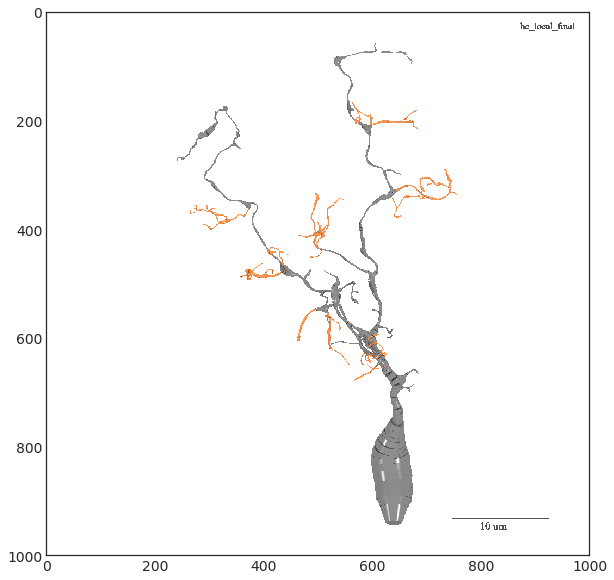

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

### Figure B&C: Voltage and calcium decay as a function of distance

We determine an injection current for every tip such that the resulting voltage pulse reaches -25mV

In [10]:
def opt_function(current,tip):
    data_opt=hc_model.run(stimtype=2,stimdur=0.1,poststimdur=0.3,rectype=20,stimtip=tip,\
                          istart=current/1e12,istop=current/1e12)
    return np.abs(np.max(data_opt[1])+0.025)

def eval_function(current,tip):
    data_opt=hc_model.run(stimtype=2,stimdur=0.1,poststimdur=0.3,rectype=20,stimtip=tip,\
                          istart=current/1e12,istop=current/1e12)
    return np.max(data_opt[1])

In [11]:
I_tip1=brent(opt_function,args=(1,),brack=(1,15,20),tol=0.001)

In [12]:
I_tip2=brent(opt_function,args=(2,),brack=(10,20,25),tol=0.001)

In [13]:
I_tip3=brent(opt_function,args=(3,),brack=(5,10,15),tol=0.001)

In [14]:
I_tip4=brent(opt_function,args=(4,),brack=(1,5,10),tol=0.001)

In [15]:
I_tip5=brent(opt_function,args=(5,),brack=(1,15,20),tol=0.001)

In [16]:
I_tip6=brent(opt_function,args=(6,),brack=(1,10,15),tol=0.001)

In [17]:
I_tip7=brent(opt_function,args=(7,),brack=(25,30,40),tol=0.001)

In [18]:
I_tip8=brent(opt_function,args=(8,),brack=(10,12,15),tol=0.001)

In [19]:
I_tip9=brent(opt_function,args=(9,),brack=(12,14,16),tol=0.001)

In [20]:
I_tip10=brent(opt_function,args=(10,),brack=(8,9,10),tol=0.001)

In [22]:
print('Injection currents')
print('tip 1',I_tip1,'pA')
print('tip 2',I_tip2,'pA')
print('tip 3',I_tip3,'pA')
print('tip 4',I_tip4,'pA')
print('tip 5',I_tip5,'pA')
print('tip 6',I_tip6,'pA')
print('tip 7',I_tip7,'pA')
print('tip 8',I_tip8,'pA')
print('tip 9',I_tip9,'pA')
print('tip 10',I_tip10,'pA')

Injection currents
tip 1 16.2144110119873 pA
tip 2 20.894766410053045 pA
tip 3 10.115585362315791 pA
tip 4 6.0952707269202016 pA
tip 5 13.729360978319393 pA
tip 6 9.388630569705324 pA
tip 7 32.700175944503094 pA
tip 8 11.769041443233897 pA
tip 9 13.644017379598292 pA
tip 10 9.17426805485528 pA


In [23]:
I_inj=np.array([I_tip1,I_tip2,I_tip3,I_tip4,I_tip5,I_tip6,I_tip7,I_tip8,I_tip9,I_tip10])*1e-12

In [24]:
# np.savetxt('data/HC_injection_current',I_inj)

In [25]:
# Load injection saved injection currents to save time
# I_inj=np.loadtxt('data/HC_injection_current')

In [26]:
data_cc=[]
for i in range(10):
    data_cc.append(hc_model.run(stimtype=2,rectype=30,stimtip=i+1,stimdur=0.2,poststimdur=0.5,\
                          istart=I_inj[i],istop=I_inj[i]))

In [27]:
# Calculate distances between cone tips along the dendrite
cone_tips = np.array([0,94,682,276,353,401,457,511,651,764,788])
cone_tip_dist = hc_model.tip_distances(morph,cone_tips)

In [28]:
signal_distance=[]
for i in range(len(data_cc)):
    for j in range(10):
        signal_distance.append([cone_tip_dist[i+1,j+1],np.max(data_cc[i].iloc[150:450,j+2]),\
                                  np.max(data_cc[i].iloc[150:450,j+13]),i+1])
signal_distance=pd.DataFrame(signal_distance,columns=['dist','v','ca','HC tip'])
signal_distance['mv']=signal_distance['v']*1000
signal_distance['mM']=signal_distance['ca']*1000

In [29]:
pal=sns.color_palette('Paired',10)
contact_cones=[1,2,3,4,5,6,6,7,8,2,2,7,9,10,1,1]

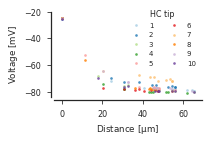

In [30]:
sns.set(context='paper',style='white',rc={"xtick.major.size": 4, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
#     plt.figure(figsize=(8/2.54,4/2.54))
    ax=sns.lmplot(data=signal_distance,x='dist',y='mv',hue='HC tip',palette=pal,fit_reg=False,aspect=1.5,size=5/2.54,scatter_kws={'s':7},legend=False)
    ax.set(ylim=(-84,-20),xlabel='Distance [$\mu m$]',ylabel='Voltage [$mV$]')
    legend=plt.legend(ncol=2,title='HC tip',fontsize=7,bbox_to_anchor=(1, 1.1))
    legend.get_title().set_fontsize(8)
    sns.despine(offset=3)
#     plt.savefig('figures/HC_v_vs_tip_distance.svg',bbox_inches='tight',dpi=300)
    plt.show()

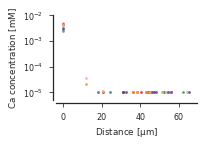

In [31]:
sns.set(context='paper',style='white',rc={"xtick.major.size": 4, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    ax=sns.lmplot(data=signal_distance,x='dist',y='mM',hue='HC tip',palette=pal,fit_reg=False,aspect=1.5,size=5/2.54,scatter_kws={'s':7},legend=False)
    ax.set(ylim=(5e-6,1e-2),yscale='log',xlabel='Distance [$\mu m$]',ylabel='Ca concentration [$mM$]')
    sns.despine(offset=3)
#     plt.savefig('figures/HC_ca_vs_tip_distance.svg',bbox_inches='tight',dpi=300)
    plt.show()

### Figure D: Heatmap of voltage along the morphology

In [32]:
# measuring signals in every compartment, done in batches of 100
data_hm0=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=100)
data_hm1=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=101)
data_hm2=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=102)
data_hm3=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=103)
data_hm4=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=104)
data_hm5=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=105)
data_hm6=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=106)
data_hm7=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=107)
data_hm8=hc_model.run(stimtype=2,stimtip=3,istart=1.01155854e-11,istop=1.01155854e-11,poststimdur=0.3,rectype=108)

In [33]:
data_hm_v=np.hstack((data_hm0.as_matrix()[:,:101],data_hm1.as_matrix()[:,1:101],data_hm2.as_matrix()[:,1:101],\
                     data_hm3.as_matrix()[:,1:101],data_hm4.as_matrix()[:,1:101],data_hm5.as_matrix()[:,1:101],\
                     data_hm6.as_matrix()[:,1:101],data_hm7.as_matrix()[:,1:101],data_hm8.as_matrix()[:,1:25]))
data_hm_v_peak=np.max(data_hm_v[150:450,1:],axis=0)

minima = min(data_hm_v_peak)
maxima = max(data_hm_v_peak)

In [34]:
im_size=np.array([int((np.max(morph['x'])-np.min(morph['x']))*100),\
                  int((np.max(morph['y'])-np.min(morph['y']))*100)])

In [35]:
# specifying the color map
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=sns.diverging_palette(255,10,center='light',as_cmap=True))

In [36]:
# drawing the actual image
im_heatmap=Image.new('RGBA',tuple(im_size+1),(255,255,255,0))

for i in range(1,morph.shape[0]):
    color=mapper.to_rgba(data_hm_v_peak[i])
    im_temp=hc_model.drcable(im_size,morph.loc[i,'x_new'],morph.loc[i,'y_new'],morph.loc[i,'z_new'],morph.loc[i,'dia_new'],\
            morph.loc[morph.loc[i,'parent'],'x_new'],morph.loc[morph.loc[i,'parent'],'y_new'],\
            morph.loc[morph.loc[i,'parent'],'z_new'],morph.loc[morph.loc[i,'parent'],'dia_new'],\
               color=(int(color[0]*255),int(color[1]*255),int(color[2]*255)))
    im_heatmap=Image.alpha_composite(im_heatmap,im_temp)

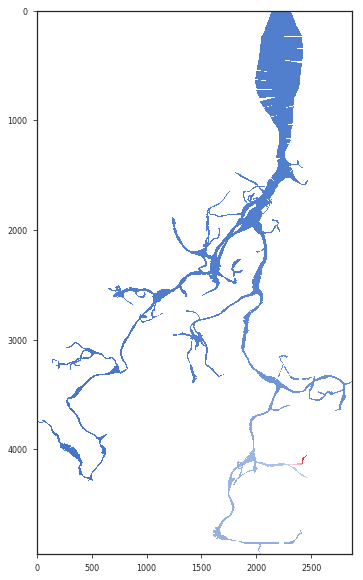

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(im_heatmap)
plt.show()

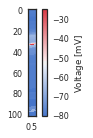

In [38]:
# get a scalebar
sns.set(context='paper',style='white',rc={"xtick.major.size": 0, "ytick.major.size": 0})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(5/2.54,5/2.54))
    test_color_bar=data_hm_v_peak.reshape(-1,8)*1000
    plt.imshow(test_color_bar,cmap=sns.diverging_palette(255,10,center='light',as_cmap=True))
    cb=plt.colorbar()
    cb.set_label('Voltage [$mV$]')
#     plt.savefig('figures/HC_cc_color_map_tip2_scale.svg',bbox_inches='tight',dpi=300)

### Figure E: Voltage decay along the dendrite

In [39]:
data_cc0=hc_model.run(stimtype=2,stimtip=3,istart=2e-12,istep=2e-12,istop=10e-12,rectype=100)
data_cc1=hc_model.run(stimtype=2,stimtip=3,istart=2e-12,istep=2e-12,istop=10e-12,rectype=101)
data_cc2=hc_model.run(stimtype=2,stimtip=3,istart=2e-12,istep=2e-12,istop=10e-12,rectype=102)

In [40]:
data_cc_v=np.hstack((data_cc0.as_matrix()[:,:101],data_cc1.as_matrix()[:,1:101],data_cc2.as_matrix()[:,1:101]))
peak_data_cc_v=[]
for i in range(5):
    peak_data_cc_v.append(np.max(data_cc_v[150+i*750:450+i*750,:],axis=0))
peak_data_cc_v=np.array(peak_data_cc_v)

In [41]:
# get nodes along the dendrite between tip3 and the soma
tip3 = 276
nodes_to_tip3 = hc_model.nodes_to_tip(morph,tip3)

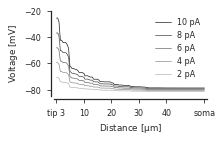

In [42]:
sns.set(context='paper',style='white',rc={"xtick.major.size": 4, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(7/2.54,4/2.54))
    for i in range(5):
        ax=plt.plot(nodes_to_tip3[:,1],peak_data_cc_v[4-i,nodes_to_tip3[:,0].astype(int)+1]*1000,label=str(10-2*i)+' pA',c=sns.dark_palette("white",n_colors=7)[i])
    plt.legend(loc='upper right')
    plt.xticks([0,10,20,30,40,nodes_to_tip3[0,1]],['tip 3',10,20,30,40,'soma'])
    plt.xlabel('Distance [$\mu m$]')
    plt.ylabel('Voltage [$mV$]')
    plt.xlim(-1,55)
    plt.ylim(-85,-20)
    sns.despine(offset=3)
#     plt.savefig('figures/HC_cc_v_decay_tip3.svg',bbox_inches='tight',dpi=300)
    plt.show()

### Figure F: Light response and morphology with cones

In [43]:
data_light=hc_model.run(scone_id=2,nrepeats=2)

In [44]:
blue_stim=np.concatenate((np.zeros(5500),np.ones(1000),np.zeros(4000),np.ones(1000),np.zeros(3502)))*0.002-0.035
green_stim=np.concatenate((np.zeros(500),np.ones(1000),np.zeros(9000),np.ones(1000),np.zeros(3502)))*0.002-0.035

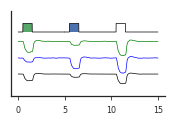

In [45]:
sns.set(context='paper',style='white',rc={"xtick.major.size": 4, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(7/2.54,4/2.54))
    plt.plot(data_light.iloc[20000:,0],blue_stim[5000:],c='black')
    plt.plot(data_light.iloc[15000:20000,0],green_stim[:5000],c='black')
    plt.fill_between(data_light.iloc[20000:25000,0],-0.035,blue_stim[5000:10000])
    plt.fill_between(data_light.iloc[15000:20000,0],-0.035,green_stim[:5000])
    plt.plot(data_light.iloc[15000:,0],data_light.iloc[15000:,15]-0.004,c='blue')
    plt.plot(data_light.iloc[15000:,0],data_light.iloc[15000:,5],c='green')
    plt.plot(data_light.iloc[15000:,0],data_light.iloc[15000:,21]+0.01,c='black')
    plt.ylim(-0.05,-0.03)
    plt.xticks([15,20,25,30],([0,5,10,15]))
    plt.yticks([])
    sns.despine()
#     plt.savefig('figures/HC_light_stim2.svg')

In [46]:
image=hc_model.run(d=1,R=1,stimtype=0,scone_id=2,recolor=True)

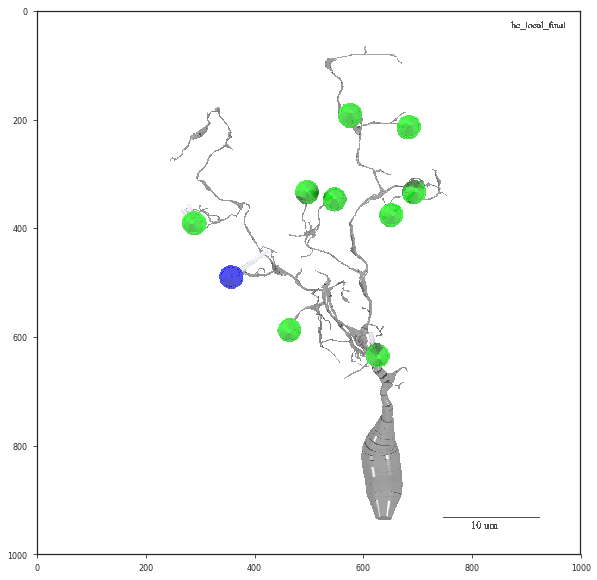

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()